In [4]:
%reset

In [22]:
!which python

/Users/soyoungpark/anaconda3/bin/python


In [23]:
!echo $CONDA_DEFAULT_ENV

base


# DAMA Day Workshop

## Welcome to this DAMA Day Workshop!
If you have any questions about this notebook, please contact us:
Victoria Da Poian (victoria.dapoian@nasa.gov)
Eric Lyness (eric.i.lyness@nasa.gov)

### In this notebook:
- Processing the Data
- Exploring the Data 
- Putting data in a ML format


Data = Csv file with :
- 1 column for USID (identification of the spectrum)
- 1950 columns of mass spectra (raw science data)
- 7 columns for params (parameters linked to the instrument and measurement)
- 2 columns for labels (6 different categories, 64 samples)

# Processing and Exploring the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [5]:
import pandas as pd
import os
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
def encoder(dataToEncode): #encode label values (label1 label2) as integer values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    print("encoded_Y", encoded_Y.shape, encoded_Y[:2])
    classes = encoder.classes_
    # convert the vector of integers to dummy variables (i.e. one hot encoded) 
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = encoded_Y.reshape(len(encoded_Y), 1) #Soyoung commented out for 1DCNN training
    Y = onehot_encoder.fit_transform(integer_encoded)
    return(encoded_Y) #Soyoung changed from Y to encoded_Y

def printEncodertoLabels(dataToEncode, nb_categories): # print the relations between the class values and the encoded integers
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    for i in range(nb_categories):
        print(str(i) + " : " + encoder.inverse_transform([i]))
        
def dicEncodertoLabels(dataToEncode, nb_categories): # create a dictionary between the real labels and the encoded integers values
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(dataToEncode)
    arraytoLabelDico = {}
    for k in range(nb_categories):
        encoded_array = np.zeros(nb_categories)
        encoded_array[k] = 1
        inverted_label = encoder.inverse_transform([argmax(encoded_array)])
        arraytoLabelDico[tuple(encoded_array)] = str(inverted_label)
    return(arraytoLabelDico)
 
    
def operationNormalizeX(x): #normalization process for our input data
    return(x/(1+x))

In [7]:
###Load INPUT data File
file = 'ml_data_damaday_final_VDP.csv'
filename = file.split(".csv")[0]
dataset = pd.read_csv(file)  

In [8]:
###Info about input data File 
print(dataset.head())
print(dataset.shape)

# print(dataset.info())
# print(dataset.describe())
# print(dataset.dtypes())

         USID  0  1  2  3  4  5  6  7  8  ...  1950   Param1  Param2  \
0  8198000001  0  0  0  0  0  0  0  0  0  ...     0  12.6549       5   
1  8198000002  0  0  0  0  0  0  0  0  0  ...     0  12.2765       5   
2  8198000003  0  0  0  0  0  0  0  0  0  ...     0  12.7667       5   
3  8198000004  0  0  0  0  0  0  0  0  0  ...     0  12.4442       5   
4  8198000005  0  0  0  0  0  0  0  0  0  ...     0  13.1107       5   

     Param3  Param4  Param5  Param6  Param7  Label1  Label2  
0  0.463842       1    3812      83    0.01       A      10  
1  0.644139       1    2891      99    0.01       A      10  
2  0.417654       1    2720     102    0.01       A      10  
3  0.712478       1    1961      86    0.01       A      10  
4  0.566622       1    2652      98    0.01       A      10  

[5 rows x 1961 columns]
(26685, 1961)


### Analysis of the Columns (USID, Mass Spec, Params, Labels)

In [9]:
###Columns names
columns_names = dataset.columns.tolist()
listAllParams = columns_names[-9:-2]
print(listAllParams)
nberParams = len(listAllParams)

###Just the params part
dataset_params = dataset[listAllParams]
print(dataset_params)

['Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6', 'Param7']
        Param1  Param2    Param3  Param4  Param5  Param6     Param7
0      12.6549       5  0.463842       1    3812      83   0.010000
1      12.2765       5  0.644139       1    2891      99   0.010000
2      12.7667       5  0.417654       1    2720     102   0.010000
3      12.4442       5  0.712478       1    1961      86   0.010000
4      13.1107       5  0.566622       1    2652      98   0.010000
...        ...     ...       ...     ...     ...     ...        ...
26680  50.5495       1  0.000000       1     767      13  35.279999
26681  50.5172       1  0.000000       1     635      11  35.619999
26682  50.5172       1  0.000000       1     676      13  33.009998
26683  50.5495       1  0.000000       1     757      13  31.400000
26684  50.5172       1  0.000000       1     686      15  31.540001

[26685 rows x 7 columns]


In [10]:
###Here you select the params you want to remove 
listParams = [] #no params to remove
#listParams = ["Param1", "Param2"] #if you want to remove Param1 and Param2

In [11]:
###Y values (2 options for the labels)
y_1 = dataset.Label1
y_2 = dataset.Label2

###Define X values (all the dataset, only mass spec data, mass spec data + params)
Xall = dataset.drop(['Label1','Label2'],axis=1) #all data
XnoUSID = Xall.drop(['USID'],axis=1) #all data without USID
XmassSpec = XnoUSID.drop(listAllParams, axis=1) #just mass spec data
XmassSpec.shape

(26685, 1951)

### Define your inputs X and Y

In [12]:
#Which input data X do you want to use?
X = XnoUSID.drop([param for param in listParams], axis=1)
inputSize = X.shape[1]

#Which label y do you want to use?
y=y_1
nb_categories = len(pd.unique(y))
print(nb_categories)

print(X[:10])

6
   0  1  2  3  4  5  6  7  8  9  ...  1948  1949  1950   Param1  Param2  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.6549       5   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.2765       5   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.7667       5   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.4442       5   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.1107       5   
5  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.3281       5   
6  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9860       5   
7  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0204       5   
8  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  12.9817       5   
9  0  0  0  0  0  0  0  0  0  0  ...     0     0     0  13.0290       5   

     Param3  Param4  Param5  Param6  Param7  
0  0.463842       1    3812      83    0.01  
1  0.644139       1    2891      99    0.01  
2  0.417654       1    2720     10

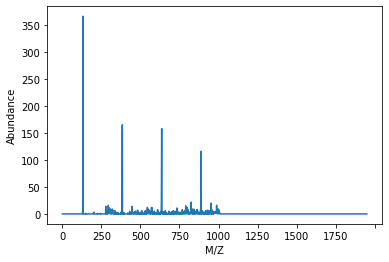

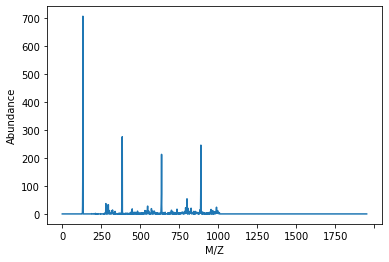

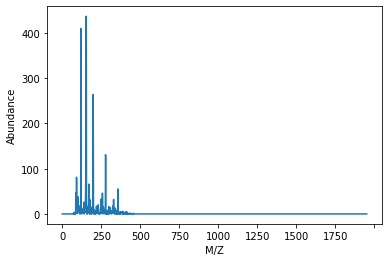

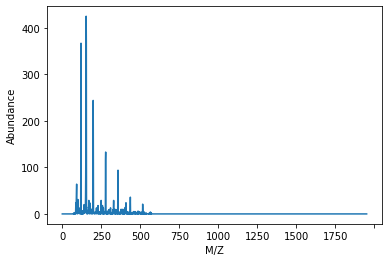

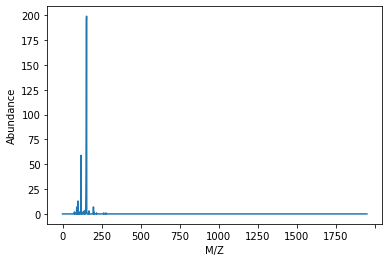

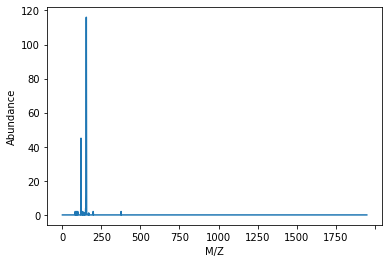

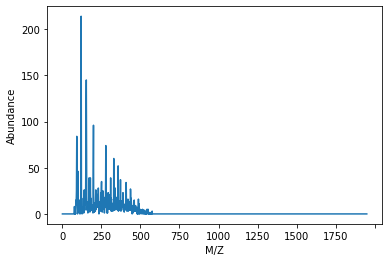

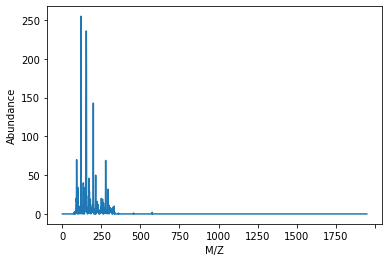

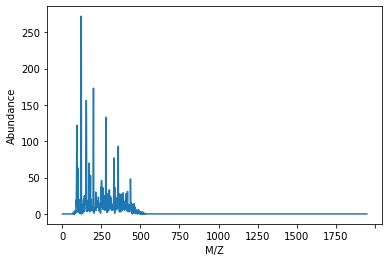

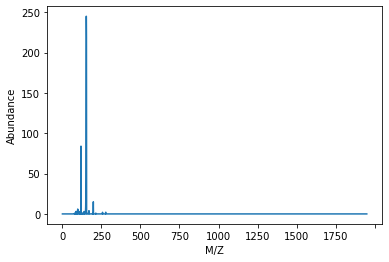

In [13]:
## Plot some mass specs
for i in range(1,100,10):
    massSpec = XmassSpec.iloc[i]
    #print(massSpec)
    ax=massSpec.plot()
    ax.set_ylabel('Abundance')
    ax.set_xlabel('M/Z')
    plt.show()

### Encode the labels as integers

In [14]:
###Encode class values as integers
Y = encoder(y) #Note, Soyoung did not reshape y.
print("Y", Y.shape)
printEncodertoLabels(y, nb_categories)
arraytoLabelDico = dicEncodertoLabels(y, nb_categories)
print(arraytoLabelDico)
print("\nX: {} ; X(noUSID): {} ; y (initial): {} ; y(encoded): {} ".format(X.shape, XnoUSID.shape, y.shape, Y.shape))
print("\nList of the different {} labels:\n {}  ".format(nb_categories, pd.unique(y)))

encoded_Y (26685,) [0 0]
Y (26685,)
['0 : A']
['1 : B']
['2 : C']
['3 : D']
['4 : E']
['5 : F']
{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0): "['A']", (0.0, 1.0, 0.0, 0.0, 0.0, 0.0): "['B']", (0.0, 0.0, 1.0, 0.0, 0.0, 0.0): "['C']", (0.0, 0.0, 0.0, 1.0, 0.0, 0.0): "['D']", (0.0, 0.0, 0.0, 0.0, 1.0, 0.0): "['E']", (0.0, 0.0, 0.0, 0.0, 0.0, 1.0): "['F']"}

X: (26685, 1958) ; X(noUSID): (26685, 1958) ; y (initial): (26685,) ; y(encoded): (26685,) 

List of the different 6 labels:
 ['A' 'B' 'C' 'D' 'E' 'F']  


### Normalization Process

In [15]:
###Normalization process

# ###Min - Max scaler
# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# X_scale = min_max_scaler.fit_transform(X)
# X_norm = pd.DataFrame(min_max_scaler.transform(X), index=X.index, columns=X.columns)

X = X.select_dtypes(exclude=['object']).apply(operationNormalizeX,axis=0)
print(X[:10])


     0    1    2    3    4    5    6    7    8    9  ...  1948  1949  1950  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     Param1    Param2    Param3  Param4    Param5    Param6    Param7  
0  0.926766  0.833333  0.316866     0.5  0.999738  0.988095  0.009901

Now, we split the dataset into training, testing and validation sets.

In [16]:
###Split dataset
train_test_ratio = 0.2 #80% is used for the training
test_val_ratio = 0.5 #Half for validation, half for testing

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=train_test_ratio)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=test_val_ratio)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(21348, 1958) (2668, 1958) (2669, 1958) (21348,) (2668,) (2669,)


# Soyoung appends

## Q1. Is there a better process than the unsupervised → supervised we are using?  

#### A1-1. Approach #1. Without manual feature engineering/dimentionlity reduction
Ref: https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf


In [17]:
print(X_train.shape)
X_train.head(2)


(21348, 1958)


,0,1,2,3,4,5,6,7,8,9,...,1948,1949,1950,Param1,Param2,Param3,Param4,Param5,Param6,Param7
26133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.991394,0.500000,0.000000,0.500000,0.950000,0.666667,0.980392
15789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.950964,0.666667,0.130813,0.666667,0.997481,0.800000,0.833333


In [18]:
Y_train.shape #np array

(21348,)

In [19]:
print(Y_train.shape)
Y_train[:2]

(21348,)


array([2, 4])

## Try tensorflow 2D

https://www.datacamp.com/community/tutorials/cnn-tensorflow-python


https://www.tensorflow.org/guide/keras/sequential_model
https://www.tensorflow.org/tutorials/images/cnn

https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf

#https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/



In [113]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

### Getting Dimention right for 1D CNN model

In [1]:
#X_train: (21348, 1958)
#Y_train: (21348, )
n_spectrastep=X_train.shape[1]
num_sensors=1


model = models.Sequential()
model.add(Reshape((n_spectrastep, num_sensors), input_shape=(n_spectrastep,)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_spectrastep,num_sensors))) #
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
model.add(Dense(1, activation='relu'))

model.summary()

NameError: name 'X_train' is not defined

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=1, 
                    validation_data=(X_val, Y_val))

NameError: name 'model' is not defined

84/84 - 1s - loss: 7.5787 - accuracy: 0.1870


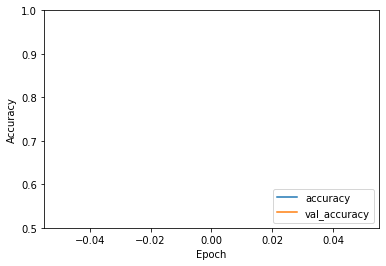

In [126]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

In [127]:
print(test_acc)

0.18696141242980957


## Q2. How can we make more data? Transfer learning is still a big question mark, how is it implementable? What is the best way?  

#### A2-1: Approach 2-1: Simulation generating mass spectra. 

#### A3-1. Approach 1. Improving Signal to Noise ratio/detection rate 

## Q4. Realtime automated determination in the rover?